In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
786,ham,It does it on its own. Most of the time it fix...,NaN,NaN,NaN
1028,ham,"Lol you forgot it eh ? Yes, I'll bring it in babe",NaN,NaN,NaN
4757,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s...",just as a shop has to give a guarantee on wha...,NaN,NaN
962,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
2107,ham,Hmmm ... And imagine after you've come home fr...,NaN,NaN,NaN
4078,ham,O i played smash bros &lt;#&gt; religiously.,NaN,NaN,NaN
2415,ham,Huh means computational science... Y they like...,NaN,NaN,NaN
3854,spam,Free msg: Single? Find a partner in your area!...,NaN,NaN,NaN
748,ham,Is there a reason we've not spoken this year? ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3719,ham,"Yeah why not, is the gang all ready"
3373,ham,Also andros ice etc etc
3473,ham,", how's things? Just a quick question."
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
4724,ham,There'll be a minor shindig at my place later ...
4964,ham,"A few people are at the game, I'm at the mall ..."
4897,ham,Oh for fuck's sake she's in like tallahassee
4212,ham,I attended but nothing is there.
551,ham,"Hurry up, I've been weed-deficient for like th..."
1397,ham,Then we wait 4 u lor... No need 2 feel bad lar...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

([<matplotlib.patches.Wedge at 0x25c2a6c1970>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

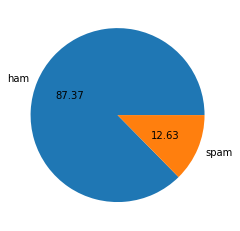

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [16]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

KeyError: 'num_characters'

<Figure size 864x432 with 0 Axes>